<a href="https://colab.research.google.com/github/marcio-lfo/devai/blob/main/Grupo3_projeto1_tarefa1_COUNT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto 1 - Classificação de Decisões Judiciais**

**Abordagens tradicionais de Aprendizado de Máquina e Modelos Neurais de Linguagens**

Grupo 3

# **Tarefa 1 - parte 1**

**Objetivo**: Estender os códigos desenvolvidos em sala
para incorporar novos algoritmos e configurações.

**Opção do Vectorizer : Count**


In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.8 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset

In [ ]:
dataset = load_dataset('joelniklaus/brazilian_court_decisions')

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['process_number', 'orgao_julgador', 'publish_date', 'judge_relator', 'ementa_text', 'decision_description', 'judgment_text', 'judgment_label', 'unanimity_text', 'unanimity_label'],
        num_rows: 3234
    })
    validation: Dataset({
        features: ['process_number', 'orgao_julgador', 'publish_date', 'judge_relator', 'ementa_text', 'decision_description', 'judgment_text', 'judgment_label', 'unanimity_text', 'unanimity_label'],
        num_rows: 404
    })
    test: Dataset({
        features: ['process_number', 'orgao_julgador', 'publish_date', 'judge_relator', 'ementa_text', 'decision_description', 'judgment_text', 'judgment_label', 'unanimity_text', 'unanimity_label'],
        num_rows: 405
    })
})

In [ ]:
dataset['train'][0]

{'process_number': '0800304-08.2018.8.02.0000',
 'orgao_julgador': 'Tribunal Pleno',
 'publish_date': '12/03/2019',
 'judge_relator': 'Des. João Luiz Azevedo Lessa',
 'ementa_text': 'DIREITO PENAL E PROCESSUAL PENAL. REVISÃO CRIMINAL. ART. 621 DO CÓDIGO DE PROCESSO PENAL. REQUERENTE CONDENADO EM JÚRI POPULAR PELA PRÁTICA DOS CRIMES DE HOMICÍDIO DUPLAMENTE QUALIFICADO E HOMICÍDIO QUALIFICADO TENTADO. PLEITO DE REFAZIMENTO DA DOSIMETRIA DA PENA IMPOSTA AO REQUERENTE. ADMISSIBILIDADE NA VIA REVISIONAL. PRECEDENTES. ALEGAÇÃO DE ERRO NO PROCESSO DE DOSIMETRIA DA PENA. COMPORTAMENTO DA VÍTIMA. CIRCUNSTÂNCIA JUDICIAL NEUTRA QUE NÃO PODE SER CONSIDERADA DE FORMA DESFAVORÁVEL AO SENTENCIANDO SEGUNDO PRECEDENTES DO SUPERIOR TRIBUNAL DE JUSTIÇA E NOVO ENTENDIMENTO DA CÂMARA CRIMINAL DESTE TRIBUNAL DE JUSTIÇA. AFASTAMENTO. CULPABILIDADE. AUSÊNCIA DE EXPOSIÇÃO DE MOTIVOS PARA O INCREMENTO DA PENA-BASE. AFASTADO O DESVALOR. VALORAÇÃO ATRIBUÍDA ÀS CIRCUNSTÂNCIAS DO CRIME MANTIDA. FUNDAMENTAÇÃO IDÔNEA

In [ ]:
train_texts = dataset['train']['decision_description']
train_labels = dataset['train']['judgment_label']

test_texts = dataset['test']['decision_description']
test_labels = dataset['test']['judgment_label']

print(f'\nTrain size: {len(train_texts)} -- {len(train_labels)}')
print(f'Test size: {len(test_texts)} -- {len(test_labels)}')


Train size: 3234 -- 3234
Test size: 405 -- 405


In [ ]:
from collections import Counter

print(f'Train Labels Distribution: {Counter(train_labels)}')
print(f'Test Labels Distribution: {Counter(test_labels)}')

Train Labels Distribution: Counter({'no': 1960, 'partial': 677, 'yes': 597})
Test Labels Distribution: Counter({'no': 234, 'partial': 93, 'yes': 78})


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

label_encoder.fit(train_labels)

train_labels = label_encoder.transform(train_labels)
test_labels = label_encoder.transform(test_labels)

print(f'Train Labels Distribution: {Counter(train_labels)}')
print(f'Test Labels Distribution: {Counter(test_labels)}')

Train Labels Distribution: Counter({0: 1960, 1: 677, 2: 597})
Test Labels Distribution: Counter({0: 234, 1: 93, 2: 78})


In [ ]:
!python -m spacy download pt_core_news_sm

2023-12-02 16:46:37.865218: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-02 16:46:37.865297: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-02 16:46:37.865343: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-02 16:46:37.879758: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-02 16:46:39.189043: W tensorflow/compiler/

In [ ]:
import spacy

from tqdm import tqdm

def preprocess_texts(list_texts):
  nlp = spacy.load('pt_core_news_sm', disable=['ner'])
  new_texts = []
  with tqdm(total=len(list_texts), desc='Preprocessing') as pbar:
    for text in list_texts:
      doc = nlp(text)
      tokens = [t.lemma_.lower() for t in doc if t.pos_ != 'PUNCT' and not t.is_stop]
      texto_normalizado = ' '.join(tokens)
      new_texts.append(texto_normalizado)
      pbar.update(1)
  return new_texts

In [ ]:
train_texts = preprocess_texts(train_texts)

Preprocessing: 100%|██████████| 3234/3234 [01:07<00:00, 47.76it/s]


In [ ]:
test_texts = preprocess_texts(test_texts)

Preprocessing: 100%|██████████| 405/405 [00:08<00:00, 45.66it/s]


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# vectorizer_option = 'binary'
vectorizer_option = 'count'
# vectorizer_option = 'tf_idf'

vectorizer = None

if vectorizer_option == 'binary':
  vectorizer = CountVectorizer(binary=True, max_features=None, ngram_range=(1, 1))
elif vectorizer_option == 'count':
  # Vetorizador de contagem simples
  vectorizer = CountVectorizer(binary=False, max_features=None, ngram_range=(1, 1))
elif vectorizer_option == 'tf_idf':
  # Vetorizador usando TF-IDF
  vectorizer = TfidfVectorizer(max_features=None, ngram_range=(1, 1))

In [ ]:
X_train = vectorizer.fit_transform(train_texts).toarray()
X_test = vectorizer.transform(test_texts).toarray()

print(f'\nExample Raw Text: {train_texts[0]}')
print(f'\nExample Vectorized Text: {X_train[0]}')


Example Raw Text: direito penal processual penal revisão criminal artigo 621 código processo penal requerente condenado júri popular prática crimes homicídio duplamente qualificado homicídio qualificado tentado pleito refazimento dosimetria pena imposta requerente admissibilidade via revisional precedentes alegação erro processo dosimetria pena comportamento vítima circunstância judicial neutra considerada desfavorável sentenciando precedentes superior tribunal justiça entendimento câmara criminal tribunal justiça afastamento culpabilidade ausência exposição motivos incremento pena-base afastado desvalor valoração atribuída circunstâncias crime mantida fundamentação idônea pena-base reduzida compensação agravante motivação torpe atenuante confissão espontânea pena privativa liberdade redimensionada crime tentado aplicada fração redutora máxima ante distância atos praticados requerente consumação crime pena redimensionada

Example Vectorized Text: [0 0 0 ... 0 0 0]


In [ ]:
print(f'Opção do Vectorizer: {vectorizer_option}')
print(f'Tamanho do Vocabulário: {len(vectorizer.vocabulary_)}')

if vectorizer_option == 'count':
    # Obtém a contagem de palavras para cada documento
    word_counts = X_train.sum(axis=1).ravel()
    # Mostra algumas estatísticas sobre o vocabulário e as contagens de palavras dos 10 primeiros documentos
    print(f'Contagem de Palavras dos primeiros 10 Documentos: {word_counts[:10]}')

if vectorizer_option == 'tf_idf':
    idf_values = vectorizer.idf_

    # Mostra algumas estatísticas sobre o vocabulário e as contagens de palavras (ou valores TF-IDF) dos 10 primeiros termos
    print(f'Valores IDF para o Vocabulário dos 10 primeiros termos: {idf_values[:10]}')

Opção do Vectorizer: count
Tamanho do Vocabulário: 12447
Contagem de Palavras dos primeiros 10 Documentos: [101  22  49  30 111  43  64 141  25  38]


In [ ]:
# Incluindo novos algoritmos

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier

classifiers = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=1000),
    'Multinomial NB': MultinomialNB(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'MLP': MLPClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'LDA': LinearDiscriminantAnalysis()
}


Classifier: Logistic Regression
              precision    recall  f1-score   support

           0    0.83043   0.81624   0.82328       234
           1    0.59184   0.62366   0.60733        93
           2    0.63636   0.62821   0.63226        78

    accuracy                        0.73580       405
   macro avg    0.68621   0.68937   0.68762       405
weighted avg    0.73827   0.73580   0.73690       405



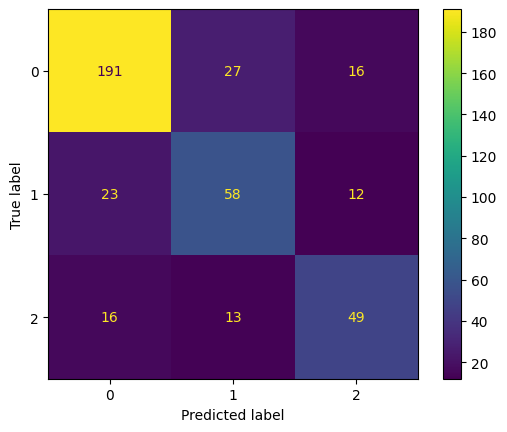


Classifier: Multinomial NB
              precision    recall  f1-score   support

           0    0.78212   0.59829   0.67797       234
           1    0.45968   0.61290   0.52535        93
           2    0.45098   0.58974   0.51111        78

    accuracy                        0.60000       405
   macro avg    0.56426   0.60031   0.57147       405
weighted avg    0.64430   0.60000   0.61078       405



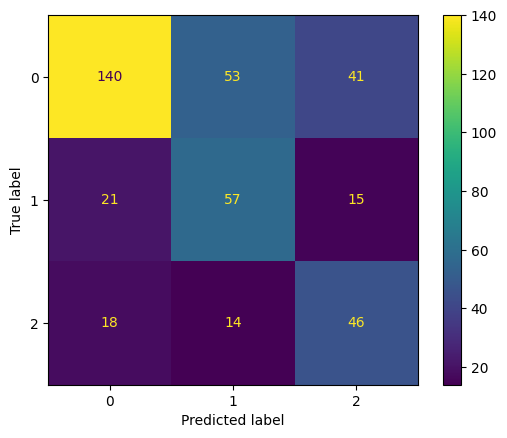


Classifier: KNN
              precision    recall  f1-score   support

           0    0.67110   0.86325   0.75514       234
           1    0.61404   0.37634   0.46667        93
           2    0.42553   0.25641   0.32000        78

    accuracy                        0.63457       405
   macro avg    0.57022   0.49867   0.51394       405
weighted avg    0.61070   0.63457   0.60509       405



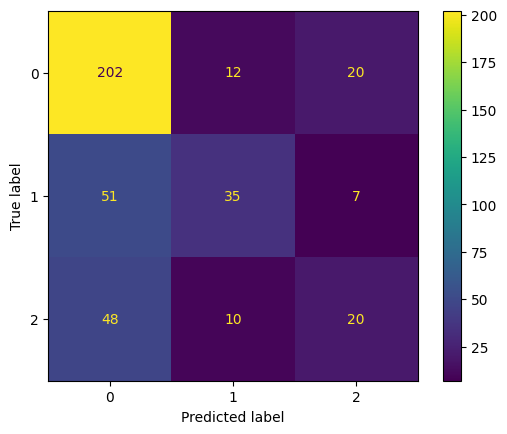


Classifier: Random Forest
              precision    recall  f1-score   support

           0    0.73355   0.95299   0.82900       234
           1    0.77966   0.49462   0.60526        93
           2    0.83333   0.44872   0.58333        78

    accuracy                        0.75062       405
   macro avg    0.78218   0.63211   0.67253       405
weighted avg    0.76336   0.75062   0.73031       405



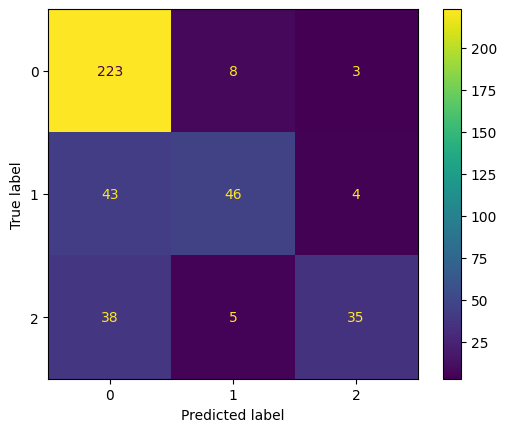


Classifier: Gradient Boosting
              precision    recall  f1-score   support

           0    0.72241   0.92308   0.81051       234
           1    0.68182   0.48387   0.56604        93
           2    0.70000   0.35897   0.47458        78

    accuracy                        0.71358       405
   macro avg    0.70141   0.58864   0.61704       405
weighted avg    0.70877   0.71358   0.68967       405



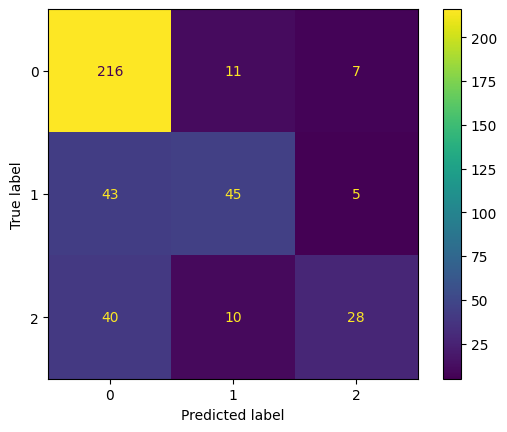


Classifier: SVM
              precision    recall  f1-score   support

           0    0.68553   0.93162   0.78986       234
           1    0.66102   0.41935   0.51316        93
           2    0.82143   0.29487   0.43396        78

    accuracy                        0.69136       405
   macro avg    0.72266   0.54862   0.57899       405
weighted avg    0.70608   0.69136   0.65777       405



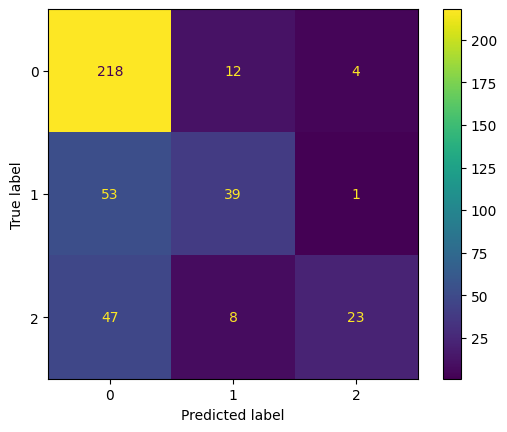


Classifier: Decision Tree
              precision    recall  f1-score   support

           0    0.76793   0.77778   0.77282       234
           1    0.53261   0.52688   0.52973        93
           2    0.57895   0.56410   0.57143        78

    accuracy                        0.67901       405
   macro avg    0.62650   0.62292   0.62466       405
weighted avg    0.67750   0.67901   0.67821       405



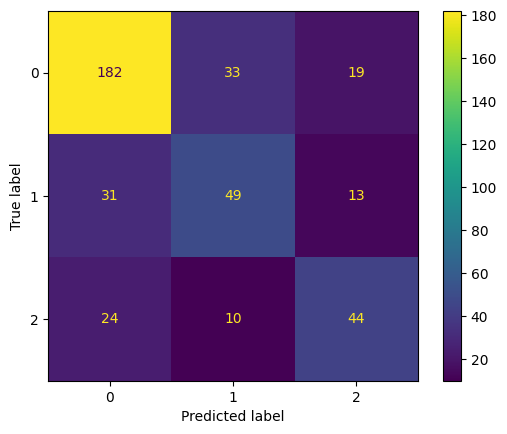


Classifier: MLP
              precision    recall  f1-score   support

           0    0.82661   0.87607   0.85062       234
           1    0.68085   0.68817   0.68449        93
           2    0.65079   0.52564   0.58156        78

    accuracy                        0.76543       405
   macro avg    0.71942   0.69663   0.70556       405
weighted avg    0.75928   0.76543   0.76065       405



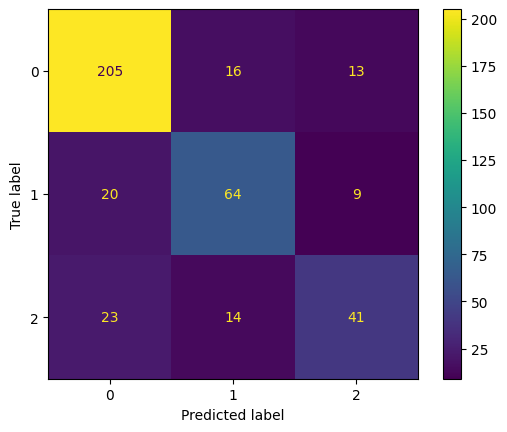


Classifier: AdaBoost
              precision    recall  f1-score   support

           0    0.71277   0.85897   0.77907       234
           1    0.59211   0.48387   0.53254        93
           2    0.63830   0.38462   0.48000        78

    accuracy                        0.68148       405
   macro avg    0.64772   0.57582   0.59720       405
weighted avg    0.67072   0.68148   0.66486       405



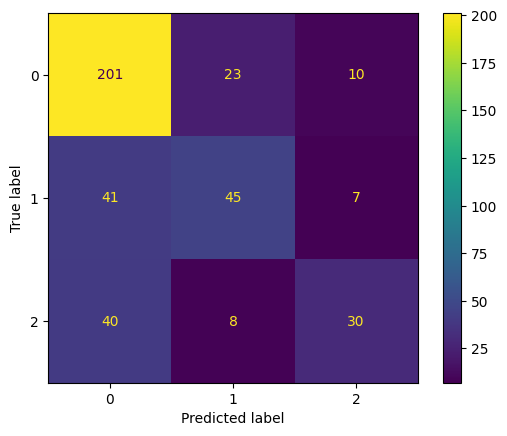


Classifier: LDA
              precision    recall  f1-score   support

           0    0.71707   0.62821   0.66970       234
           1    0.35644   0.38710   0.37113        93
           2    0.31313   0.39744   0.35028        78

    accuracy                        0.52840       405
   macro avg    0.46221   0.47091   0.46371       405
weighted avg    0.55646   0.52840   0.53963       405



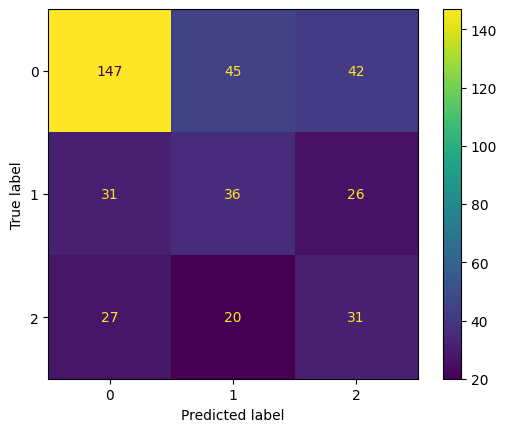

In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, ConfusionMatrixDisplay

for classifier_name, classifier in classifiers.items():

  print(f'\nClassifier: {classifier_name}')

  classifier.fit(X_train, train_labels)

  y_pred = classifier.predict(X_test)

  report = classification_report(test_labels, y_pred, digits=5)

  print(report)

  ConfusionMatrixDisplay.from_predictions(test_labels, y_pred)

  plt.show()

  """
    Gerar os resultados do classification_report para cada um dos 10 algoritmos.
    Montar uma planilha com os resultados das medidas (Acurácia e weighted avg
    da Precisão, Cobertura e F1-Score).
    Destacar em negrito o melhor algoritmo para cada medida de avaliação.
  """

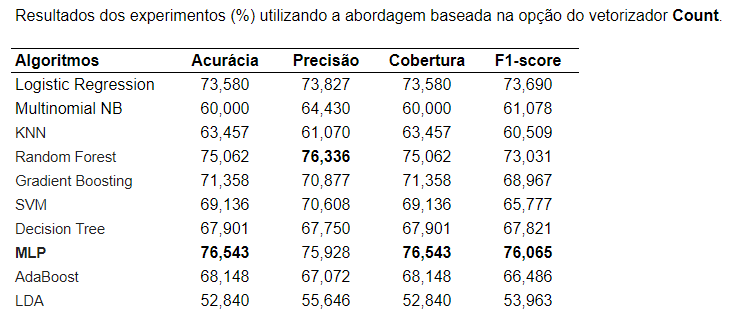

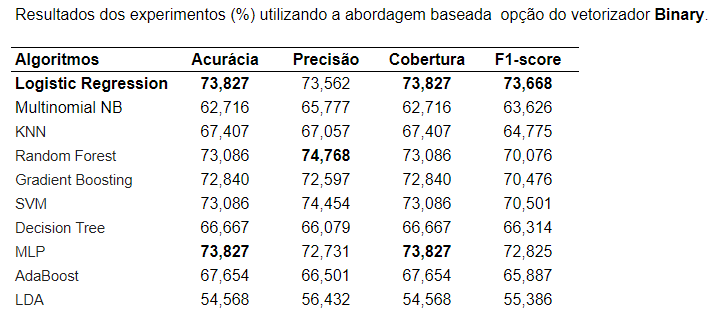

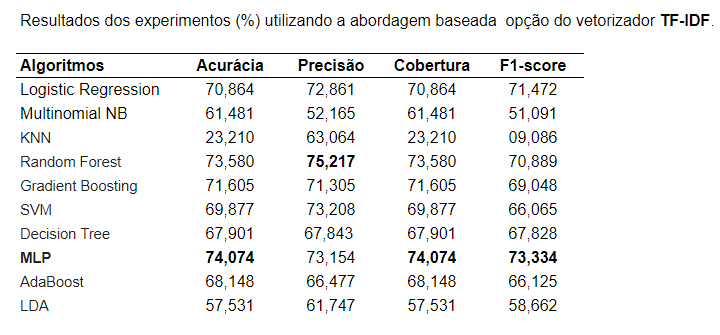